In [15]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings

In [16]:
mall = pd. read_csv('/content/Mall_Customers.csv')

In [17]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
mall.shape

(200, 5)

In [19]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
mall = mall.set_index('CustomerID')

In [22]:
mall.head ()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [23]:
X = mall. iloc[:,:4]
Y = mall. index

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, random_state=42)
y_train.shape

(140,)

In [25]:
label_encoder = preprocessing.LabelEncoder()
mall['Gender'] = label_encoder.fit_transform(mall['Gender'])

In [27]:
warnings. filterwarnings("ignore")

In [28]:
cluster =[]
for k in range (1,11):
  kmean=KMeans(n_clusters=k).fit(mall)
  cluster.append(kmean.inertia_)

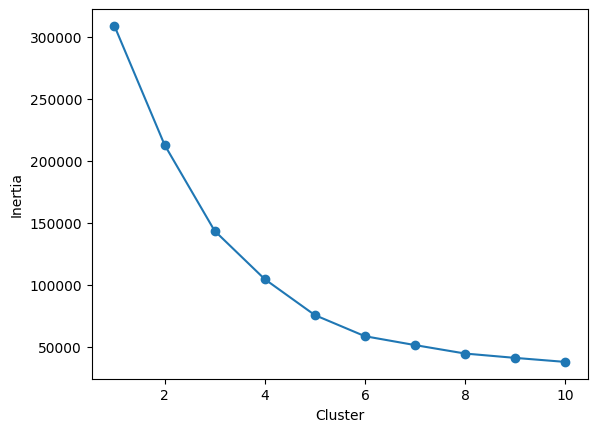

In [41]:
plt. plot (range(1,11), cluster, marker="o" )
plt.xlabel ('Cluster')
plt.ylabel ('Inertia')
plt.show()

In [42]:
km=KMeans(n_clusters=5).fit(mall)
mall['Labels'] = km.labels_
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,4
3,0,20,16,6,3
4,0,23,16,77,4
5,0,31,17,40,3


In [43]:
centers = np.array(km.cluster_centers_)

In [47]:
x=mall['Annual Income (k$)']
y=mall['Spending Score (1-100)']

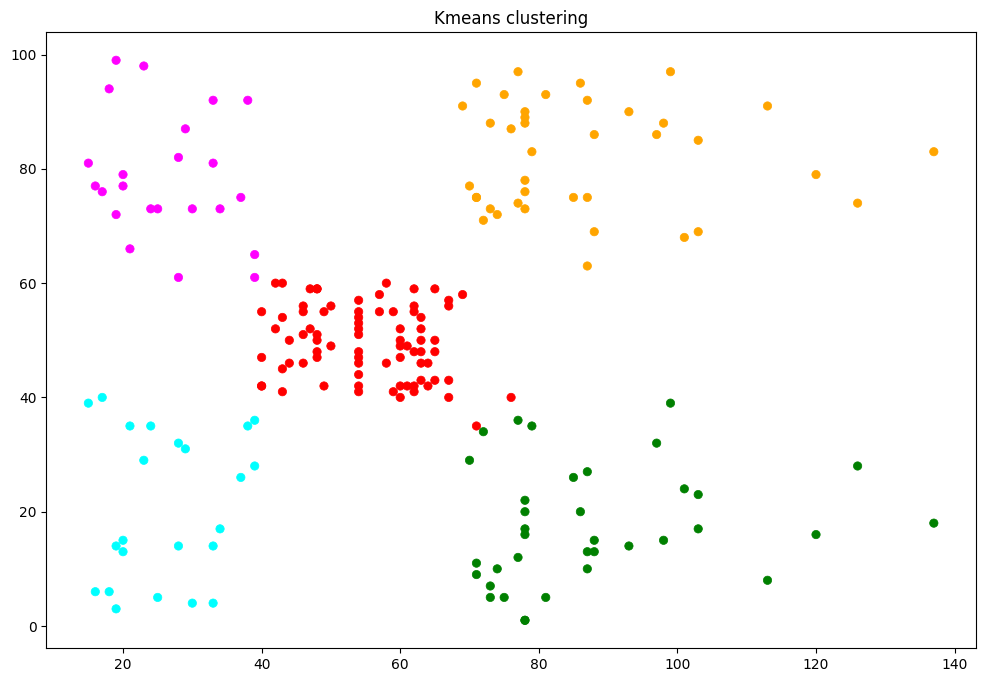

In [48]:
colors = {0: 'red', 1: 'orange', 2: 'green', 3: 'cyan' ,4: 'magenta'}
plt.figure(figsize=(12, 8))
plt.scatter(x, y, linewidths=0.5, color =mall['Labels'].map(colors))
plt.title('Kmeans clustering')
plt. show()

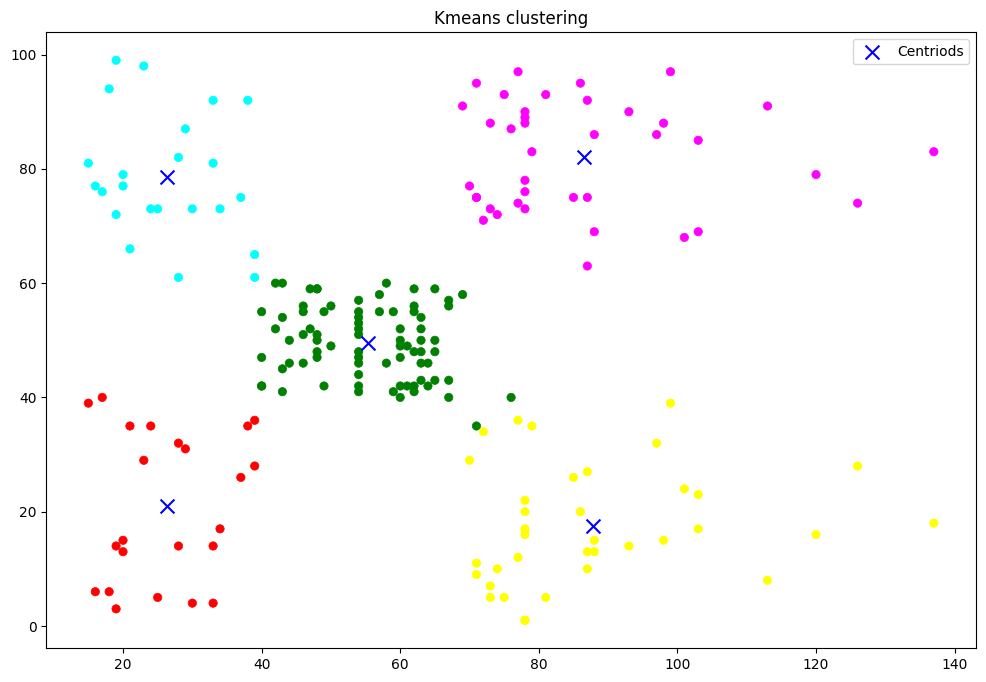

In [50]:
colors = {0: 'green', 1: 'magenta', 2: 'yellow',3: 'red' ,4:'cyan'}
plt. figure(figsize=(12, 8))
plt.scatter(x, y, linewidths=0.5, color=mall[ 'Labels'].map(colors))
plt. scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], s = 100, c = 'blue', label='Centriods', marker='x')
plt.title('Kmeans clustering')
plt.legend()
plt. show()